# Install Required Libraries

In [ ]:
!pip install -U alive_progress
!pip install geomloss[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210078 sha256=bdcee279c1101dccc7d97ac26a20ab10fdf8731281abb37de6e4338475398432
  Stored in directory: /root/.cache/pip/wheels/01/e1/49/37e6bde9886439057450c494a79b0bef8bbe897a54aebfc757
Successfully built grapheme
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-p

In [ ]:
import torch

In [ ]:
import re
import sys
import random
import pickle
import IPython
import itertools
import warnings
from sklearn import preprocessing

import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import linear_model
from geomloss import SamplesLoss
from alive_progress import alive_bar
# from scipy.stats import energy_distance
from sklearn.metrics import mean_squared_error

from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot

[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


In [ ]:
warnings.filterwarnings(action='once')

In [ ]:
init_seed = 1640

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sys.path.append(f'/content/drive/MyDrive/joint_level_generation_translation/')

In [ ]:
!ls

drive  sample_data


In [ ]:
%cd drive/MyDrive/joint_level_generation_translation/accuracies

/content/drive/MyDrive/joint_level_generation_translation/accuracies


In [ ]:
!pwd

/content/drive/MyDrive/joint_level_generation_translation/accuracies


# Evaluation Metrics

In [ ]:
import os
import scipy

orig_vae_gan_test_accuracies.pickle 360 360 False
[ 0.007 -0.013 -0.007  0.107 -0.06  -0.007 -0.033 -0.04   0.013  0.047
  0.     0.007 -0.093  0.013  0.08   0.053 -0.067 -0.093  0.    -0.007
  0.227  0.087 -0.007  0.04   0.107  0.087  0.033 -0.013  0.173  0.207
  0.18  -0.06   0.093  0.12   0.     0.193  0.12   0.14   0.093  0.04
  0.193  0.233  0.107  0.    -0.087  0.12   0.013  0.107  0.187  0.013
  0.173  0.093 -0.033  0.113  0.027  0.053  0.053  0.173  0.113  0.007
  0.06   0.047  0.107 -0.013 -0.06   0.08   0.107 -0.047  0.047 -0.107
 -0.04  -0.18  -0.04  -0.067 -0.033  0.02   0.007  0.14   0.02  -0.047
  0.127  0.193  0.067  0.127  0.007 -0.013  0.007  0.067  0.047  0.02
  0.053  0.027  0.187  0.133  0.     0.08   0.067  0.04   0.06   0.073
  0.1    0.113  0.027  0.14   0.107  0.1    0.12   0.14   0.027  0.047
  0.02  -0.073  0.013 -0.033  0.087  0.113  0.127  0.16   0.013  0.033
  0.    -0.027  0.187  0.047  0.04   0.     0.033  0.047  0.047  0.173
  0.08   0.16   0.14   0.073 

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


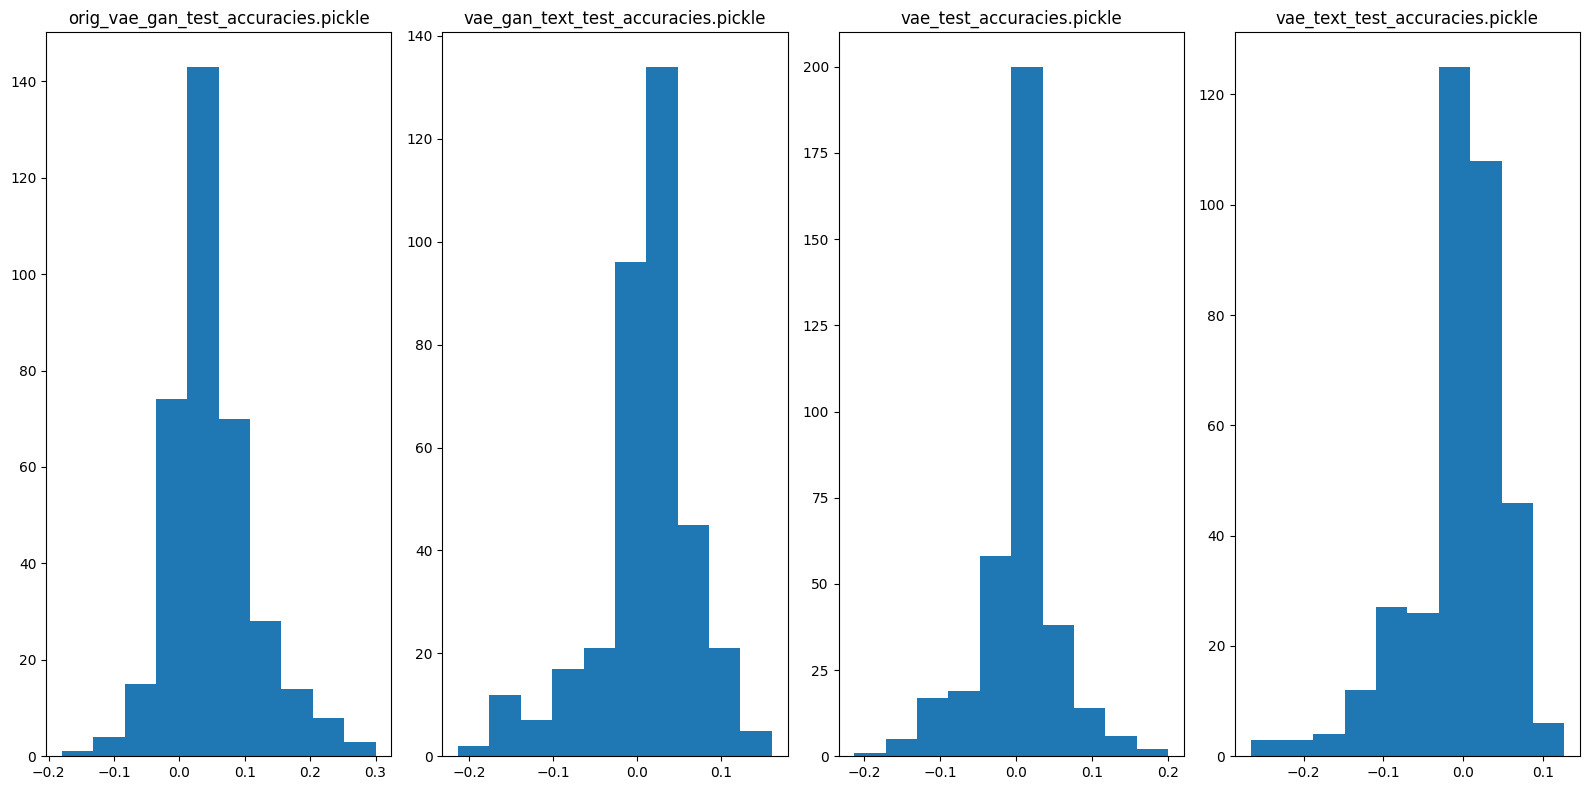

In [ ]:
i = 0

filename = os.fsdecode("our_vae_gan_test_accuracies.pickle")
with open(filename, "rb") as fh:
  our_data = pickle.load(fh)
  our_data = np.array([our_data[key] for key in sorted(our_data.keys())])

fig = pyplot.figure(figsize=(16, 8))
for file in sorted(os.listdir(".")):
    filename = os.fsdecode(file)
    if filename.endswith(".pickle") and "test" in filename and "our_vae_gan" not in filename:
      i += 1
      with open(filename, "rb") as fh:
        data = pickle.load(fh)
        data = np.array([data[key] for key in sorted(data.keys())])
        pyplot.subplot(1, 4, i)
        pyplot.hist(our_data - data)
        print(filename, len(data), len(our_data), set(data) == set(our_data))
        di =  np.around(our_data - data, decimals=3)
        print(di)
        print( " normaltest:", scipy.stats.normaltest(di))
        print( " shapiro:", scipy.stats.shapiro(di))
        print(" wilcoxon:", scipy.stats.wilcoxon(di, alternative="greater"))
        print("---------------------------------------------------------")


        pyplot.title(filename)
    else:
        continue


plt.tight_layout()
pyplot.show()

orig_vae_gan_train_accuracies.pickle
 normaltest: NormaltestResult(statistic=189.57809618369956, pvalue=6.817724832330357e-42)
 shapiro: ShapiroResult(statistic=0.9731971025466919, pvalue=4.7123959069829594e-24)
 wilcoxon: WilcoxonResult(statistic=4579908.5, pvalue=0.0)
---------------------------------------------------------
vae_gan_text_train_accuracies.pickle
 normaltest: NormaltestResult(statistic=555.0637362433188, pvalue=2.947413867028264e-121)
 shapiro: ShapiroResult(statistic=0.9162083864212036, pvalue=6.506995280120111e-39)
 wilcoxon: WilcoxonResult(statistic=3255398.0, pvalue=2.487621333538448e-277)
---------------------------------------------------------
vae_text_train_accuracies.pickle
 normaltest: NormaltestResult(statistic=576.0859789305173, pvalue=8.02636904513943e-126)
 shapiro: ShapiroResult(statistic=0.91145259141922, pvalue=9.965446132923083e-40)
 wilcoxon: WilcoxonResult(statistic=3164679.0, pvalue=9.125385898493255e-265)
------------------------------------------

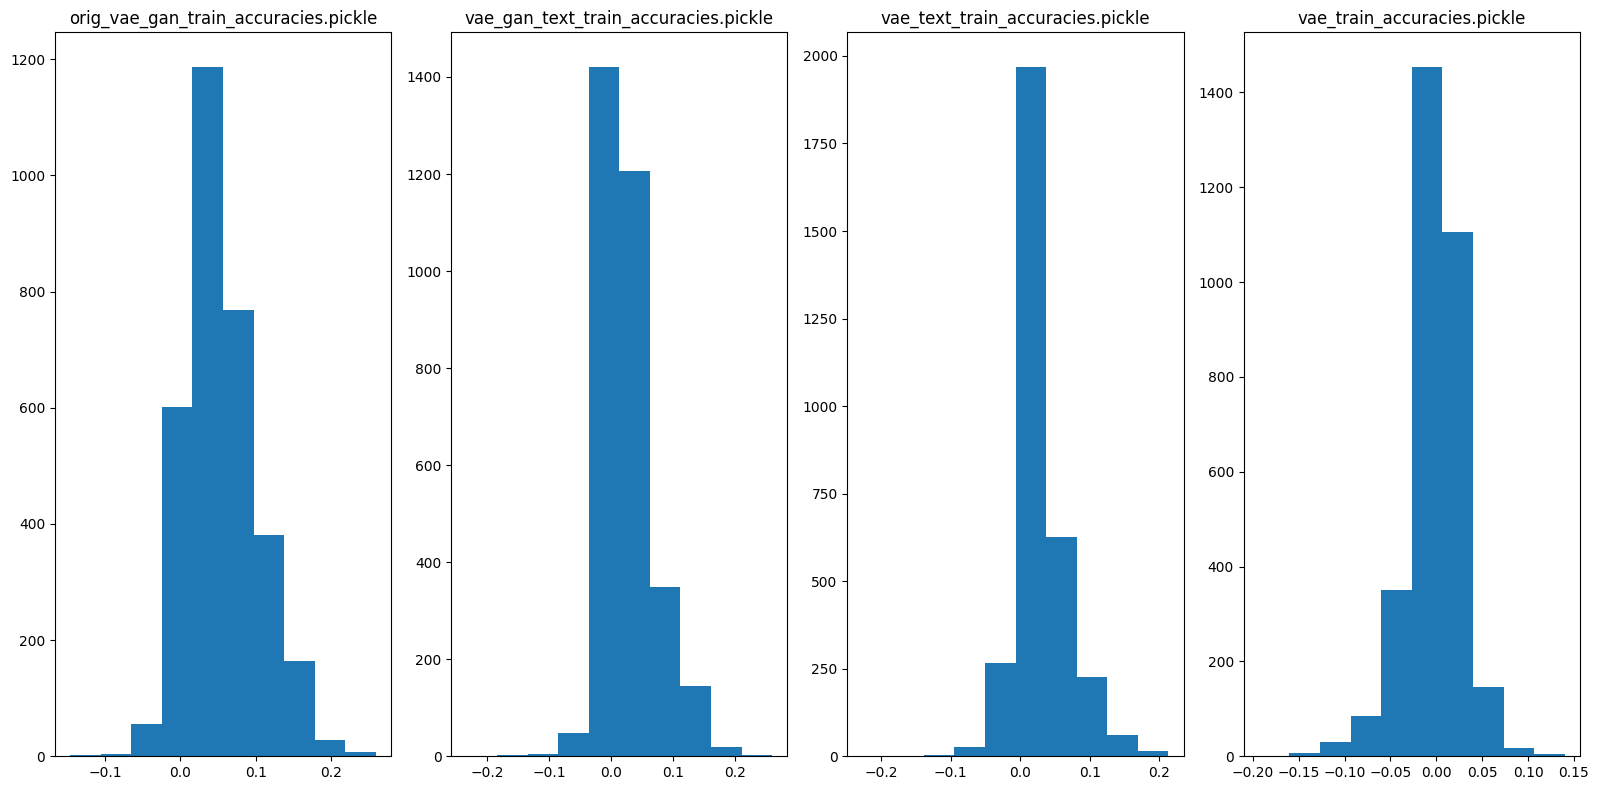

In [ ]:
i = 0
fig = pyplot.figure(figsize=(16, 8))
filename = os.fsdecode("our_vae_gan_train_accuracies.pickle")
with open(filename, "rb") as fh:
  our_data = pickle.load(fh)
  our_data = np.array([our_data[key] for key in sorted(our_data.keys())])

for file in sorted(os.listdir(".")):
    filename = os.fsdecode(file)
    if filename.endswith(".pickle") and "train" in filename and "our_vae_gan" not in filename:
      i += 1
      with open(filename, "rb") as fh:
        data = pickle.load(fh)
        data = np.array([data[key] for key in sorted(data.keys())])
        pyplot.subplot(1, 4, i)
        pyplot.hist(our_data - data)
        print(filename)
        di =  np.around(our_data - data, decimals=3)
        print( " normaltest:", scipy.stats.normaltest(di))
        print( " shapiro:", scipy.stats.shapiro(di))
        print(" wilcoxon:", scipy.stats.wilcoxon(di, alternative="greater"))
        print("---------------------------------------------------------")


        pyplot.title(filename)
    else:
        continue


plt.tight_layout()
pyplot.show()